# EDA

In [22]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# load dataset
lyft_csv = 'lyft_weather_holiday.csv'

df = pd.read_csv(lyft_csv)

# check the shape of the dataset
print(df.shape)
df.head(10) 


df.info() # summary of the dataset (columns, rows, data types, memory usage, etc.)
df.describe() # summary statistics for numerical columns

# check for missing values
df.isnull().sum() # no missing values

(324077, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324077 entries, 0 to 324076
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             324077 non-null  object 
 1   rideable_type       324077 non-null  object 
 2   started_at          324077 non-null  object 
 3   ended_at            324077 non-null  object 
 4   start_station_name  269389 non-null  object 
 5   start_station_id    269389 non-null  object 
 6   end_station_name    261780 non-null  object 
 7   end_station_id      261780 non-null  object 
 8   start_lat           324077 non-null  float64
 9   start_lng           324077 non-null  float64
 10  end_lat             323710 non-null  float64
 11  end_lng             323710 non-null  float64
 12  member_casual       324077 non-null  object 
 13  tavg                324077 non-null  float64
 14  tmin                324077 non-null  float64
 15  tmax                3

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name     54688
start_station_id       54688
end_station_name       62297
end_station_id         62297
start_lat                  0
start_lng                  0
end_lat                  367
end_lng                  367
member_casual              0
tavg                       0
tmin                       0
tmax                       0
prcp                       0
snow                  324077
wdir                       0
wspd                       0
wpgt                  324077
pres                       0
tsun                  324077
day_of_the_week            0
Holiday                    0
dtype: int64

<AxesSubplot: >

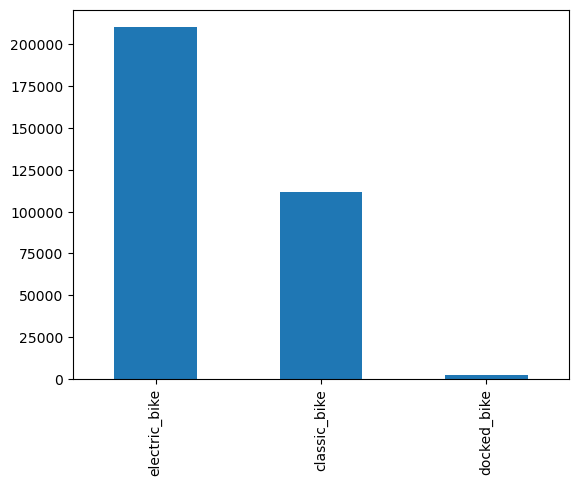

In [28]:
# EDA of Numerical Variables

# check the distribution of the target variable (rideable_type):
df['rideable_type'].value_counts(normalize=True) # 0: docked_bike, 1: electric_bike
df['rideable_type'].value_counts().plot.bar() # 0: docked_bike, 1: electric_bike



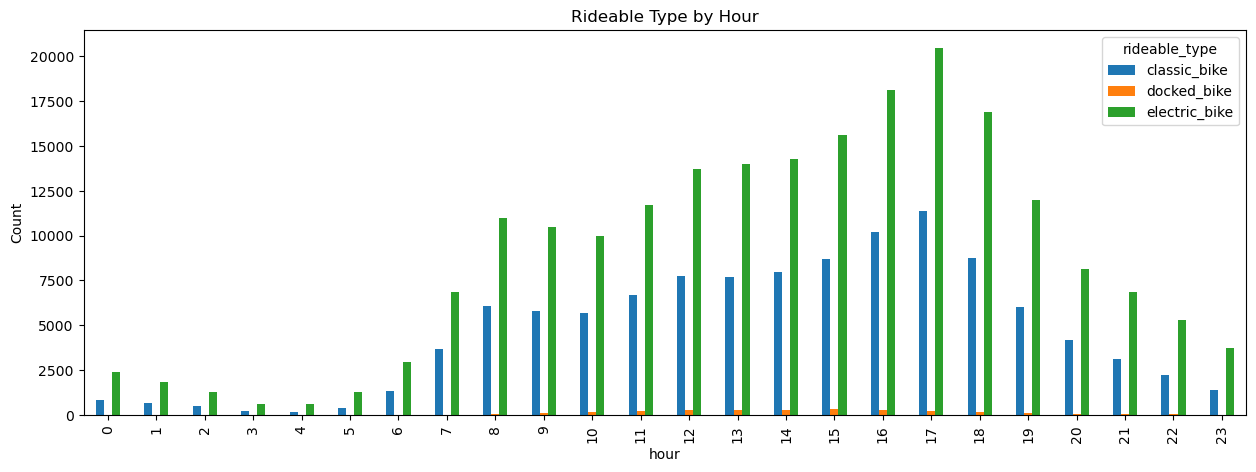

In [34]:
# view column names and data types in single dataframe
df.dtypes # all columns are numerical

# create duration column in minutes using started_at and ended_at columns
df['started_at'] = pd.to_datetime(df['started_at']) # convert started_at column to datetime
df['ended_at'] = pd.to_datetime(df['ended_at']) # convert ended_at column to datetime
df['duration'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]') # create duration column in minutes

# explore relationship between start_at time and rideable_type:
# create hour column from started_at column
df['hour'] = df['started_at'].dt.hour

# create a pivot table to view the relationship between hour and rideable_type
hour_rideable_type = df.pivot_table(index='hour', columns='rideable_type', values='duration', aggfunc='count')
hour_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Hour')
plt.show()



